In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Ecommerce_Insights.csv")
df.describe()

,ID,Age,Purchased,Income,Clicks,Page Views,Subscription,Account Age,Session Duration,Cart Abandonment,Discount Applied,Number of Orders,Customer Support Interactions
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,58.484900,0.505100,74819.049591,25.667100,100.640400,0.503200,256.005900,62.973450,0.492500,0.492400,25.680000,5.047300
std,2886.89568,23.535615,0.499999,26010.603543,14.468739,57.429922,0.500015,142.341428,32.816599,0.499969,0.499967,14.410023,3.153864
min,1.00000,18.000000,0.000000,30000.070000,1.000000,1.000000,0.000000,10.000000,5.030000,0.000000,0.000000,1.000000,0.000000
25%,2500.75000,38.000000,0.000000,52531.020000,13.000000,51.000000,0.000000,133.000000,35.000000,0.000000,0.000000,13.000000,2.000000
50%,5000.50000,58.000000,1.000000,74914.380000,26.000000,101.000000,1.000000,256.000000,63.455000,0.000000,0.000000,26.000000,5.000000
75%,7500.25000,79.000000,1.000000,97103.625000,38.000000,150.000000,1.000000,380.000000,91.107500,1.000000,1.000000,38.000000,8.000000
max,10000.00000,99.000000,1.000000,119998.520000,50.000000,200.000000,1.000000,500.000000,119.970000,1.000000,1.000000,50.000000,10.000000


In [2]:
df.columns

Index(['ID', 'Name', 'Age', 'City', 'Email', 'Join Date', 'Purchased',
       'Income', 'Device Used', 'Browser', 'Clicks', 'Page Views',
       'Subscription', 'Last Login', 'Device OS', 'Account Age',
       'Session Duration', 'Cart Abandonment', 'Customer Type',
       'Discount Applied', 'Payment Method', 'Number of Orders',
       'Shipping Method', 'Customer Support Interactions'],
      dtype='object')

In [3]:
## Handling missing values

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows with too many missing values (if necessary)
df = df.dropna(thresh=len(df.columns) * 0.7)  # Drops rows with more than 30% missing values

# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert date columns to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Login'] = pd.to_datetime(df['Last Login'])

# Verify changes
print(df.info())


Missing values:
 ID                               0
Name                             0
Age                              0
City                             0
Email                            0
Join Date                        0
Purchased                        0
Income                           0
Device Used                      0
Browser                          0
Clicks                           0
Page Views                       0
Subscription                     0
Last Login                       0
Device OS                        0
Account Age                      0
Session Duration                 0
Cart Abandonment                 0
Customer Type                    0
Discount Applied                 0
Payment Method                   0
Number of Orders                 0
Shipping Method                  0
Customer Support Interactions    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18252\861497467.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [4]:
## Aggregate Revenue Data

# Create a new 'Revenue' column (assuming revenue = Number of Orders * Income per order)
df['Revenue'] = df['Number of Orders'] * df['Income']

# Aggregate revenue over time (daily)
df_time_series = df.groupby(df['Join Date'].dt.date)['Revenue'].sum().reset_index()

# Rename columns
df_time_series.columns = ['Date', 'Revenue']

# Convert Date column to datetime format
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])

# Sort by Date
df_time_series = df_time_series.sort_values(by='Date')

# Display the first few rows
print(df_time_series.head())


        Date      Revenue
0 2023-02-02  46619140.83
1 2023-02-03  18174898.81
2 2023-02-04   8773506.13
3 2023-02-05  14040416.82
4 2023-02-06  21328937.97


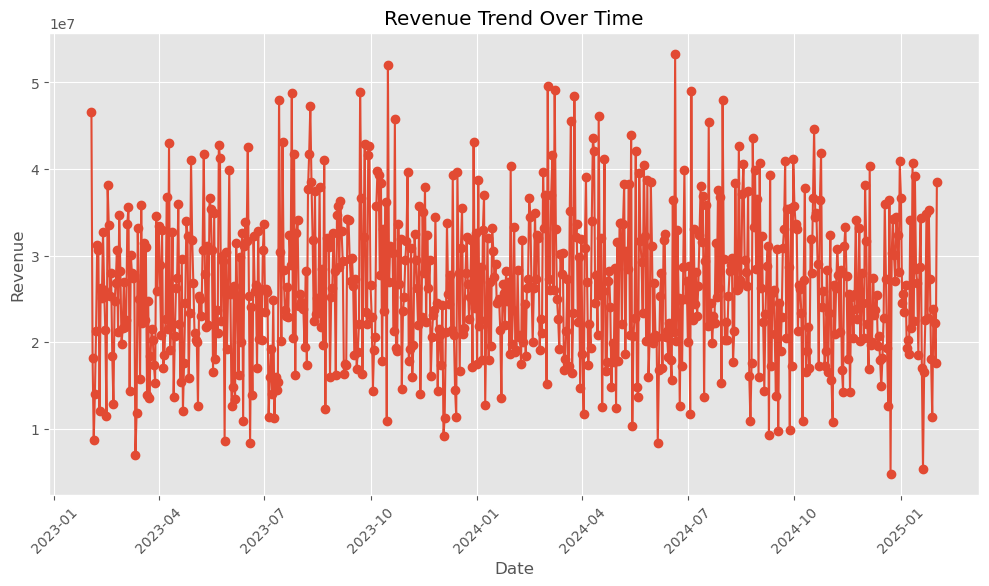

In [6]:
## Visualize Revenue Trends

import matplotlib.pyplot as plt
import seaborn as sns

# Use a default style or comment this line out if it still causes issues
plt.style.use("ggplot")  # Alternative style

# Plot revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Date'], df_time_series['Revenue'], marker='o', linestyle='-')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.show()



In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(df_time_series['Revenue'])

# Print results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Interpretation
if adf_test[1] < 0.05:
    print("The data is stationary (reject H0).")
else:
    print("The data is not stationary (fail to reject H0). Consider differencing.")


ADF Statistic: -12.581059595262792
p-value: 1.910020640725594e-23
The data is stationary (reject H0).


Train size: 584, Test size: 147


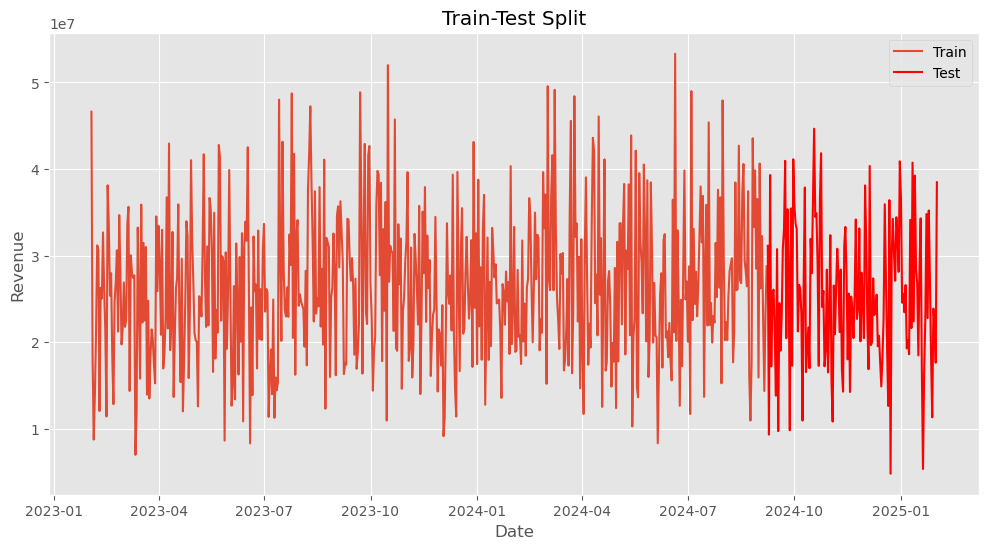

In [8]:
## Split Data for Training & Testing


from sklearn.model_selection import train_test_split

# Set index as Date for time series modeling
df_time_series.set_index("Date", inplace=True)

# Define train-test split (80% train, 20% test)
train_size = int(len(df_time_series) * 0.8)
train, test = df_time_series[:train_size], df_time_series[train_size:]

# Display sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")

# Plot train & test sets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Revenue'], label="Train")
plt.plot(test.index, test['Revenue'], label="Test", color="red")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Train-Test Split")
plt.legend()
plt.show()


In [10]:
## Train ARIMA Model
!pip install statsmodels


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

Mean Absolute Error (MAE): 6975504.138677301
Root Mean Squared Error (RMSE): 8505113.11336597


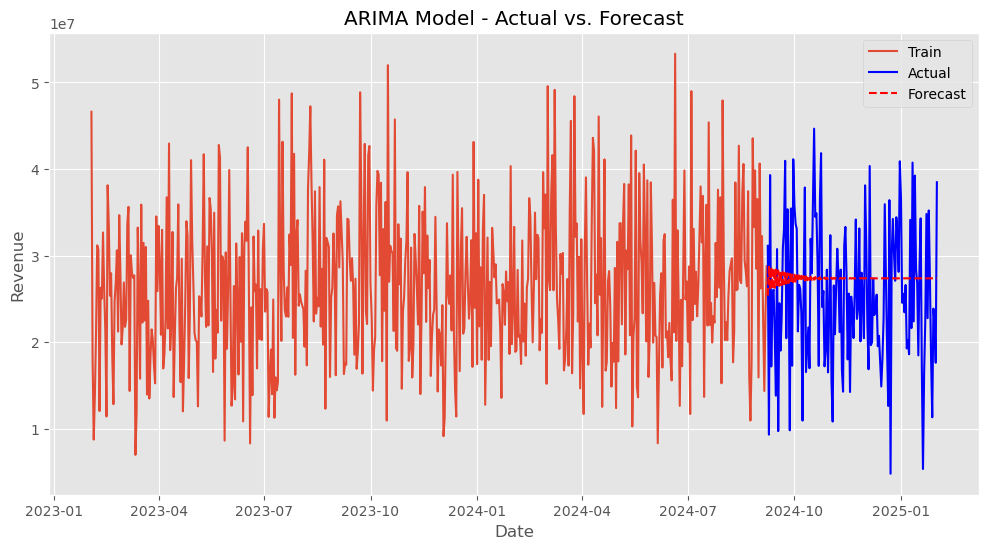

In [11]:
## Train ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define ARIMA model (p=5, d=1, q=2) - Can be tuned later
model = ARIMA(train['Revenue'], order=(5, 1, 2))

# Fit the model
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Evaluate performance
mae = mean_absolute_error(test['Revenue'], forecast)
rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast))

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Revenue'], label="Train")
plt.plot(test.index, test['Revenue'], label="Actual", color="blue")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("ARIMA Model - Actual vs. Forecast")
plt.legend()
plt.show()


In [12]:
!pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/13.3 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.4 MB/s eta 0:00:09
   --- ------------------------------------ 1.3/13.3 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.3 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/13.3 MB 1.3 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/13.3 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/13.3 MB 1.3 MB/s eta 0:00:09
   -------- ------------------------------- 2.9/13.3 MB 1.4 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/13.3 MB 1.3 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/13.3 MB 1.3 MB/s eta 0:00:08
   ----------

16:46:49 - cmdstanpy - INFO - Chain [1] start processing
16:46:50 - cmdstanpy - INFO - Chain [1] done processing


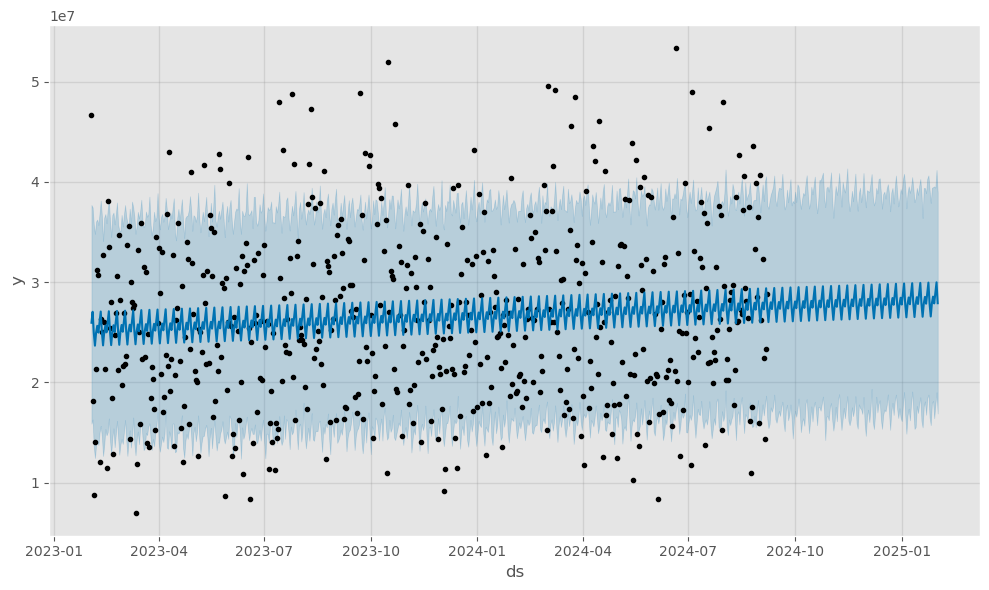

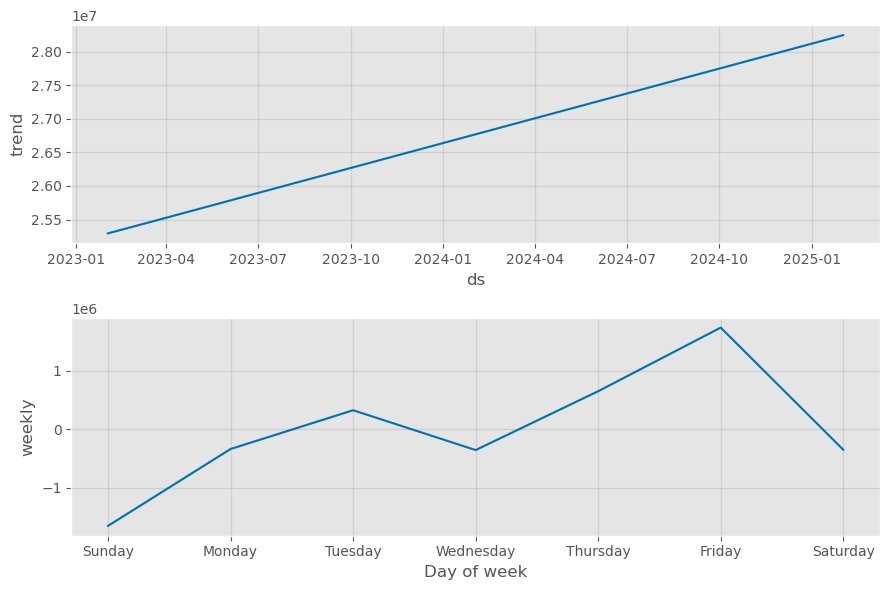

In [13]:
## prepare data for prophet

from prophet import Prophet

# Rename columns for Prophet
df_prophet = df_time_series.reset_index().rename(columns={"Date": "ds", "Revenue": "y"})

# Split into train & test
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]

# Initialize Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe
future = model.make_future_dataframe(periods=len(test))

# Predict
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()

# Plot components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()


In [14]:
## Model Comparison & Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract Prophet's forecast for test period
prophet_forecast = forecast[['ds', 'yhat']].set_index("ds").loc[test['ds']]

# Calculate MAE and RMSE
prophet_mae = mean_absolute_error(test['y'], prophet_forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(test['y'], prophet_forecast['yhat']))

print(f"Prophet MAE: {prophet_mae}")
print(f"Prophet RMSE: {prophet_rmse}")


Prophet MAE: 7190266.45597329
Prophet RMSE: 8624563.719077159


In [15]:
print(f"ARIMA MAE: {mae}, RMSE: {rmse}")
print(f"Prophet MAE: {prophet_mae}, RMSE: {prophet_rmse}")

if prophet_rmse < rmse:
    print("✅ Prophet performs better!")
else:
    print("✅ ARIMA performs better!")


ARIMA MAE: 6975504.138677301, RMSE: 8505113.11336597
Prophet MAE: 7190266.45597329, RMSE: 8624563.719077159
✅ ARIMA performs better!


In [20]:
## save the trained model
import joblib

# Save the trained ARIMA model
joblib.dump(model_fit, "arima_revenue_model.pkl")

print("Model saved successfully!")



Model saved successfully!


In [21]:
## deploy model via api(flask)

!pip install flask

In [1]:
## RUNNING THE PROJECT

from flask import Flask, request, jsonify
import joblib
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import nest_asyncio
import threading

# Apply nest_asyncio to allow running Flask in Jupyter
nest_asyncio.apply()

app = Flask(__name__)

# Load the saved ARIMA model
model = joblib.load("arima_revenue_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        input_data = request.json
        start_date = input_data.get("start_date", "2025-03-01")  
        steps = input_data.get("steps", 30)  

        future_dates = pd.date_range(start=start_date, periods=steps, freq="D")
        forecast = model.forecast(steps=steps)

        results = [{"date": str(date), "predicted_revenue": round(rev, 2)} for date, rev in zip(future_dates, forecast)]
        return jsonify(results)

    except Exception as e:
        return jsonify({"error": str(e)})

# Run Flask in a separate thread
def run_flask():
    app.run(port=5000, debug=True, use_reloader=False)

flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [2]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"start_date": "2025-03-01", "steps": 30}  

response = requests.post(url, json=data)
print(response.json())


127.0.0.1 - - [08/Feb/2025 02:38:28] "POST /predict HTTP/1.1" 200 -


[{'date': '2025-03-01 00:00:00', 'predicted_revenue': 25384769.88}, {'date': '2025-03-02 00:00:00', 'predicted_revenue': 28844942.48}, {'date': '2025-03-03 00:00:00', 'predicted_revenue': 26049914.33}, {'date': '2025-03-04 00:00:00', 'predicted_revenue': 28660483.47}, {'date': '2025-03-05 00:00:00', 'predicted_revenue': 26174827.89}, {'date': '2025-03-06 00:00:00', 'predicted_revenue': 28537672.5}, {'date': '2025-03-07 00:00:00', 'predicted_revenue': 26303746.92}, {'date': '2025-03-08 00:00:00', 'predicted_revenue': 28411349.83}, {'date': '2025-03-09 00:00:00', 'predicted_revenue': 26422567.62}, {'date': '2025-03-10 00:00:00', 'predicted_revenue': 28299857.62}, {'date': '2025-03-11 00:00:00', 'predicted_revenue': 26527583.28}, {'date': '2025-03-12 00:00:00', 'predicted_revenue': 28200706.44}, {'date': '2025-03-13 00:00:00', 'predicted_revenue': 26621221.68}, {'date': '2025-03-14 00:00:00', 'predicted_revenue': 28112296.77}, {'date': '2025-03-15 00:00:00', 'predicted_revenue': 26704682.

127.0.0.1 - - [08/Feb/2025 02:38:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2025 02:38:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2025 02:50:12] "POST /predict HTTP/1.1" 200 -
